## Decision Tree Assignment


### Theory Section

1. **What is a Decision Tree, and how does it work?**
   
   A Decision Tree is a supervised learning algorithm used for classification and regression. It splits data into branches based on feature values, creating a tree-like structure. Each internal node tests an attribute, each branch represents an outcome, and each leaf node holds a class label or output.

2. **What are impurity measures in Decision Trees?**
   
   Impurity measures determine how mixed the classes are in a dataset. Common impurity measures include **Gini Impurity** and **Entropy**. They guide the selection of the best attribute for splitting by quantifying the "disorder" in the data.

3. **What is the mathematical formula for Gini Impurity?**

   $$
   Gini = 1 - \sum_{i=1}^{n} p_i^2
   $$

   where $p_i$ is the probability of class $i$ in the node.

4. **What is the mathematical formula for Entropy?**

   $$
   Entropy = - \sum_{i=1}^{n} p_i \log_2(p_i)
   $$

   where $p_i$ is the probability of class $i$.

5. **What is Information Gain, and how is it used in Decision Trees?**
   
   Information Gain measures the reduction in entropy after a dataset is split. It helps identify the attribute that offers the most significant improvement in purity.

   $$
   IG = Entropy(parent) - \sum_{k} \frac{|D_k|}{|D|} Entropy(D_k)
   $$

6. **What is the difference between Gini Impurity and Entropy?**

   * **Gini Impurity** is computationally faster and focuses on misclassification.
   * **Entropy** is based on information theory and tends to prefer more balanced splits.

7. **What is the mathematical explanation behind Decision Trees?**
   
   Decision Trees recursively split data based on impurity metrics like Gini or Entropy. At each step, the algorithm selects the feature that yields the greatest Information Gain or lowest Gini. Splitting continues until stopping criteria (e.g., max depth or pure nodes) are met.

8. **What is Pre-Pruning in Decision Trees?**
   
   Pre-Pruning involves stopping the tree growth early by setting constraints like max depth, min samples per leaf, or min impurity decrease to prevent overfitting.

9. **What is Post-Pruning in Decision Trees?**
   
   Post-Pruning first builds a full tree and then removes branches that provide little predictive power, typically using cross-validation.

10. **What is the difference between Pre-Pruning and Post-Pruning?**

* **Pre-Pruning:** Stops tree growth early.
* **Post-Pruning:** Trims the tree after full growth to simplify it.

11. **What is a Decision Tree Regressor?**
    
    A Decision Tree Regressor predicts continuous values instead of class labels. It splits data to minimize variance within subsets rather than classification impurity.

12. **What are the advantages and disadvantages of Decision Trees?**
    
    **Advantages:** Easy to understand, requires little data preparation, handles both numerical and categorical data.
    **Disadvantages:** Prone to overfitting, unstable with small data changes, can be biased if one class dominates.

13. **How does a Decision Tree handle missing values?**
    
    Some implementations (like in `sklearn`) use surrogate splits or ignore samples with missing data during training. During prediction, missing values may be handled by going down all matching branches.

14. **How does a Decision Tree handle categorical features?**
    
    Categorical features are handled by splitting on each category. Some libraries (like `sklearn`) require manual encoding (e.g., one-hot), while others handle it natively.

15. **What are some real-world applications of Decision Trees?**

* Medical diagnosis
* Credit risk assessment
* Customer churn prediction
* Fraud detection
* Loan approval systems


### Practical Section

In [1]:
# 16.	Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 1.0


In [2]:
# 17.	Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances.

clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

print("Feature Importances (Gini):", clf_gini.feature_importances_)


Feature Importances (Gini): [0.         0.01911002 0.55727376 0.42361622]


In [3]:
# 18.	Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy.

clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)

print("Model Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))

Model Accuracy (Entropy): 0.9777777777777777


In [4]:
# 19.	Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE).

from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)

reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 0.5208021457632267


In [5]:
# 20.	Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz.

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph.view()


'decision_tree.pdf'

In [19]:
# 21.	Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Tree with max_depth = 3
clf_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_depth3.fit(X_train, y_train)
y_pred_depth3 = clf_depth3.predict(X_test)
accuracy_depth3 = accuracy_score(y_test, y_pred_depth3)

# Fully grown tree
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)
y_pred_full = clf_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

# Print results
print("Accuracy (Max Depth = 3):", accuracy_depth3)
print("Accuracy (Fully Grown Tree):", accuracy_full)



Accuracy (Max Depth = 3): 1.0
Accuracy (Fully Grown Tree): 1.0


In [20]:
# 22.	Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train with min_samples_split=5
clf_split5 = DecisionTreeClassifier(min_samples_split=5, random_state=42)
clf_split5.fit(X_train, y_train)
y_pred_split5 = clf_split5.predict(X_test)
acc_split5 = accuracy_score(y_test, y_pred_split5)

# Train default classifier
clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)

# Print the results
print("Accuracy with min_samples_split=5:", acc_split5)
print("Accuracy with default settings:", acc_default)



Accuracy with min_samples_split=5: 1.0
Accuracy with default settings: 1.0


In [21]:
# 23.	Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree on scaled data
clf_scaled = DecisionTreeClassifier(random_state=42)
clf_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, clf_scaled.predict(X_test_scaled))

# Decision Tree on unscaled data
clf_unscaled = DecisionTreeClassifier(random_state=42)
clf_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, clf_unscaled.predict(X_test))

# Results
print("Accuracy with scaling:", acc_scaled)
print("Accuracy without scaling:", acc_unscaled)



Accuracy with scaling: 1.0
Accuracy without scaling: 1.0


In [22]:
# 24.	Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Apply OvR strategy using Decision Tree Classifier
ovr_clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_ovr = ovr_clf.predict(X_test)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

print("Accuracy with One-vs-Rest:", acc_ovr)



Accuracy with One-vs-Rest: 1.0


In [10]:
# 25.	Write a Python program to train a Decision Tree Classifier and display the feature importance scores.

import pandas as pd

features = pd.DataFrame({'Feature': iris.feature_names,
                         'Importance': clf.feature_importances_})
print(features.sort_values(by='Importance', ascending=False))


             Feature  Importance
2  petal length (cm)    0.557274
3   petal width (cm)    0.423616
0  sepal length (cm)    0.019110
1   sepal width (cm)    0.000000


In [11]:
# 26.	Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree.

reg_depth5 = DecisionTreeRegressor(max_depth=5)
reg_depth5.fit(X_train, y_train)
print("MSE (Depth 5):", mean_squared_error(y_test, reg_depth5.predict(X_test)))

reg_full = DecisionTreeRegressor()
reg_full.fit(X_train, y_train)
print("MSE (Full Tree):", mean_squared_error(y_test, reg_full.predict(X_test)))


MSE (Depth 5): 0.5210801561811794
MSE (Full Tree): 0.5285088833536983


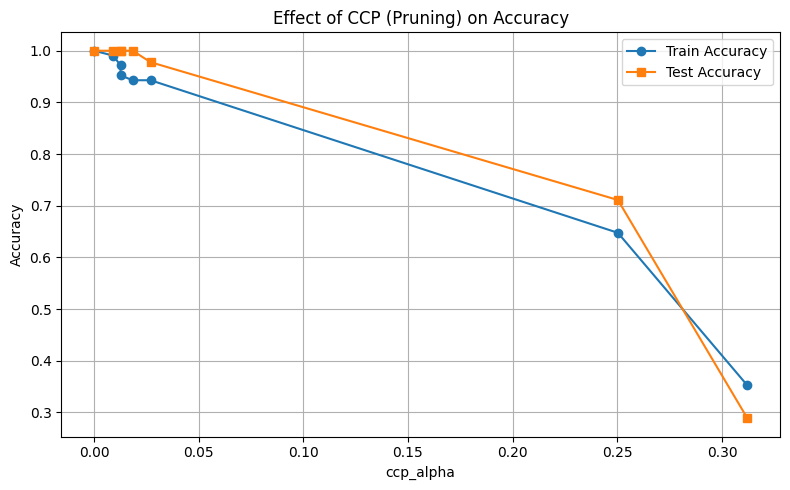

In [13]:
# 27.	Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and split data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

# Train initial tree to get pruning path
clf_base = DecisionTreeClassifier(random_state=42)
path = clf_base.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas
impurities = path.impurities

# Store train and test accuracies for each alpha
train_scores = []
test_scores = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

# Plotting the effect of pruning
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_scores, marker='s', label='Test Accuracy')
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Effect of CCP (Pruning) on Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [14]:
# 28.	Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and Fl-Score.

from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))


Precision: 0.09629629629629628
Recall: 0.3333333333333333
F1 Score: 0.14942528735632185


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


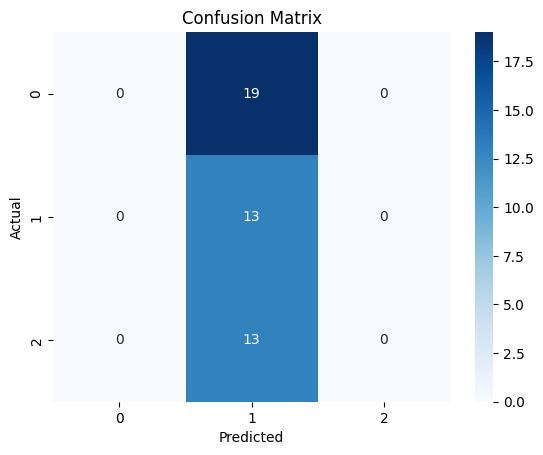

In [15]:
# 29.	Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn.

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [16]:
# 30.	Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split.

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_split': 10}
Best Accuracy: 0.9428571428571428
